# Plasma proteome profiling discovers novel proteins associated with non-alcoholic fatty liver disease
Liu et al. 2019

In this notebook we want to reproduce the results from [Liu et al](https://doi.org/10.15252/msb.20188793). The aim is to identify proteins associated with non-alcoholic fatty liver disease (NAFLD).

In [1]:
import alphastats
import plotly.io as pio

from alphastats.DataSet import DataSet

pio.renderers.default = "plotly_mimetype+notebook" 

In [2]:
!pip show alphastats

Name: alphastats
Version: 0.6.2
Summary: An open-source Python package for automated and scalable statistical analysis of mass spectrometry-based proteomics
Home-page: https://github.com/MannLabs/alphastats
Author: Mann Labs
Author-email: elena.krismer@gmail.com
License: Apache
Location: /Users/drq441/Documents/GitHub/alphastats
Requires: anndata, click, combat, data_cache, diffxpy, kaleido, numba, numba-stats, numpy, openpyxl, pandas, pingouin, plotly, pyteomics, scikit-learn, scipy, sklearn_pandas, statsmodels, streamlit, swifter, tables, tqdm, umap-learn
Required-by: 


We are going to load the `proteinGroups.txt` and the corresponding metadatafile. You can find the data [here](https://github.com/MannLabs/alphapeptstats/tree/main/testfiles/maxquant) or on ProteomeXchange [PXD011839](http://proteomecentral.proteomexchange.org/cgi/GetDataset?ID=PXD011839).
To load the proteomis data you need to create a loader object using `alphastats.MaxQuantLoader`. The whole downstream analysis will be performed on a `alphastats.DataSet`. To create the DataSet you need to provide the loader object as well as the metadata.

In [3]:
# we are going to load the proteomics data
loader = alphastats.MaxQuantLoader(
    file = "../testfiles/maxquant/proteinGroups.txt", 
    intensity_column="LFQ intensity [sample]",
    # for indexing we are going to use the gene name columm
    # it is adivsed to use the ProteinIDs for indexing as these are unique
    index_column="Gene names",
    gene_names_column=None
)
dataset = DataSet(
    loader = loader, 
    metadata_path="../testfiles/maxquant/metadata.xlsx", 
    sample_column="sample"
)

DataSet has been created.
Attributes of the DataSet can be accessed using: 
DataSet.rawinput:	 Raw Protein data.
DataSet.mat:	Processed data matrix with ProteinIDs/ProteinGroups as columns and samples as rows. All computations are performed on this matrix.
DataSet.metadata:	Metadata for the samples in the matrix. Metadata will be matched with DataSet.mat when needed (for instance Volcano Plot).


The metadata contains pretty long names, in the first step we are going to replace the names with abbreviations to make the analysis more straightforward.

In [4]:
new_names = {
    "non-alcoholic fatty liver disease": "NAFLD",
    "type 2 diabetes mellitus": "T2DM",
    "type 2 diabetes mellitus|non-alcoholic fatty liver disease": "T2DM+NAFLD"
}
dataset.metadata["disease"].replace(new_names, inplace=True)

For preprocessing we are going to use quantile normalization, k-Nearest Neighbour imputation and remove contanminants.

In [5]:
dataset.preprocess(
    log2_transform=False,
    remove_contaminations=True, 
    subset=True, 
    imputation="knn", 
    normalization="quantile"
)

In [6]:
dataset.preprocessing_info

{'Raw data number of Protein Groups': 2596,
 'Matrix: Number of ProteinIDs/ProteinGroups': 1811,
 'Matrix: Number of samples': 48,
 'Intensity used for analysis': 'LFQ intensity [sample]',
 'Log2-transformed': False,
 'Normalization': 'quantile',
 'Imputation': 'k-Nearest Neighbor',
 'Contaminations have been removed': True,
 'Contamination columns': ['Only identified by site',
  'Reverse',
  'Potential contaminant',
  'contamination_library'],
 'Number of removed ProteinGroups due to contaminaton': 98}

## Plot Volcano

Which proteins are significantly higher or lower in intensity comparing Diabetes mellitus Type 2 and Diabetes mellitus Type 2 + non-alcoholic fatty liver disease?

Calculating Students t-test...


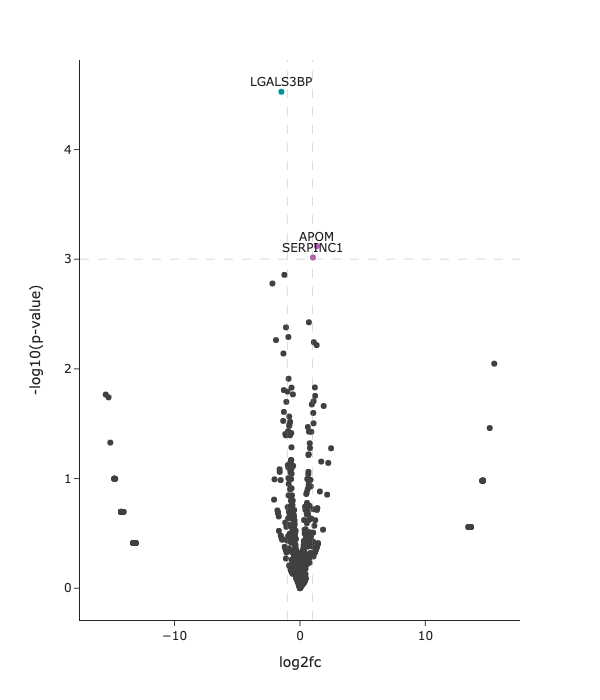

In [7]:
volcano_plot = dataset.plot_volcano(
    column="disease", # column in metadata
    group1="T2DM",
    group2="T2DM+NAFLD",
    labels=True, # add label to significantly enriched proteins
    alpha=0.001 # cutoff for pvalue
)
volcano_plot.show(renderer = "png")


## Plot Intensity

Boxplot of intensity values of T2DM and T2DM+NAFLD of idenitified enriched/downregulated proteins.

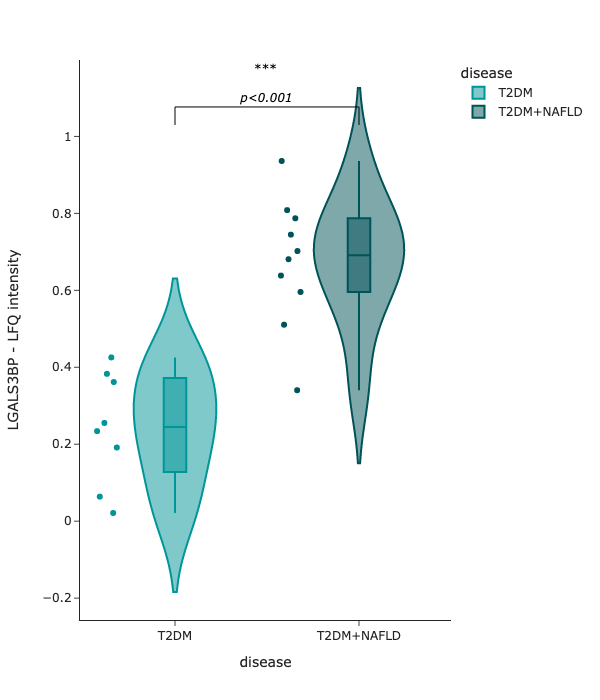

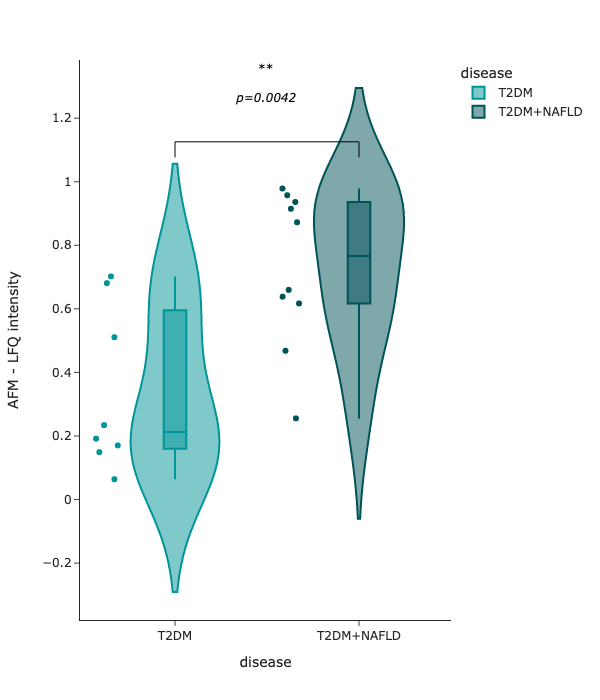

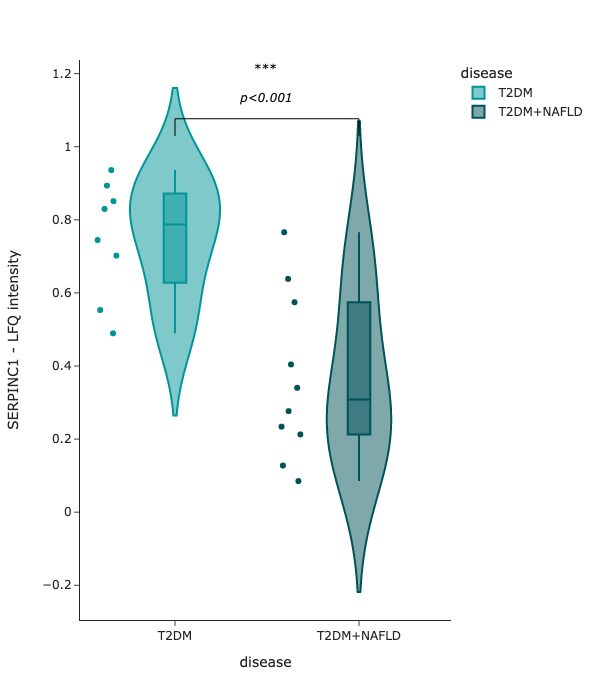

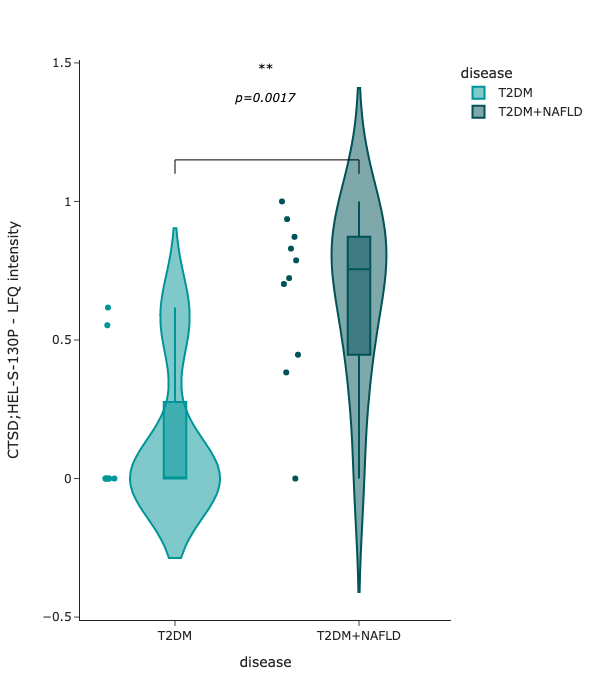

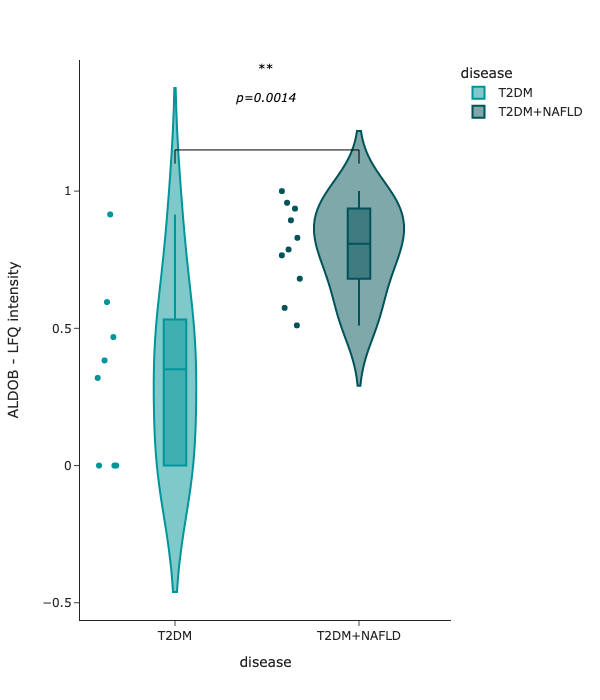

In [8]:
for protein in ["LGALS3BP","AFM","SERPINC1","CTSD;HEL-S-130P","ALDOB"]:
    plot = dataset.plot_intensity(
        method="all",
        protein_id=protein, 
        group="disease", # column in metadata
        subgroups=["T2DM","T2DM+NAFLD"], # we only want to see T2DM and T2DM+NAFLD
        add_significance=True # add bar with pvalue
        )
    plot.show(renderer = "png")

Jupyter Notebook can be found: 
https://github.com/MannLabs/alphapeptstats/blob/main/nbs/liu_2019.ipynb